In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/dataset_feature_engineering.csv')

In [3]:
df.head()

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Year,Month,Day,Hour,DayOfWeek,Is_Weekend,PartOfDay,Summary_Label,Precip_rain,Precip_snow
0,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,2006,3,31,22,4,0,night,0,True,False
1,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,2006,3,31,23,4,0,night,0,True,False
2,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2006,4,1,0,5,1,night,1,True,False
3,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,2006,4,1,1,5,1,night,0,True,False
4,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2006,4,1,2,5,1,night,1,True,False


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# For pretty plots
sns.set(style="whitegrid")
%matplotlib inline

# Univariate EDA

### Summary statistics and info

In [7]:
print('\n--- Info ---')
print(df.info())



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95912 entries, 0 to 95911
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   95912 non-null  object 
 1   Temperature (C)           95912 non-null  float64
 2   Apparent Temperature (C)  95912 non-null  float64
 3   Humidity                  95912 non-null  float64
 4   Wind Speed (km/h)         95912 non-null  float64
 5   Wind Bearing (degrees)    95912 non-null  float64
 6   Visibility (km)           95912 non-null  float64
 7   Loud Cover                95912 non-null  float64
 8   Pressure (millibars)      95912 non-null  float64
 9   Year                      95912 non-null  int64  
 10  Month                     95912 non-null  int64  
 11  Day                       95912 non-null  int64  
 12  Hour                      95912 non-null  int64  
 13  DayOfWeek                 95912 non-null  int64

In [8]:
print('\n--- Describe (Numerical Columns) ---')
print(df.describe())

print('\n--- Describe (Categorical Columns) ---')
print(df.describe(include=['object', 'category']))


--- Describe (Numerical Columns) ---
       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     95912.000000              95912.000000  95912.000000   
mean         11.937975                 10.859194      0.734844   
std           9.569620                 10.716711      0.195717   
min         -21.822222                -27.716667      0.000000   
25%           4.594444                  2.272222      0.600000   
50%          12.022222                 12.022222      0.780000   
75%          18.844444                 18.844444      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       95912.000000            95912.000000     95912.000000     95912.0   
mean           10.806764              187.506986        10.362306         0.0   
std             6.920504              107.378309         4.174204         0.0   
min             0.000000                0.0

# 1. Summary

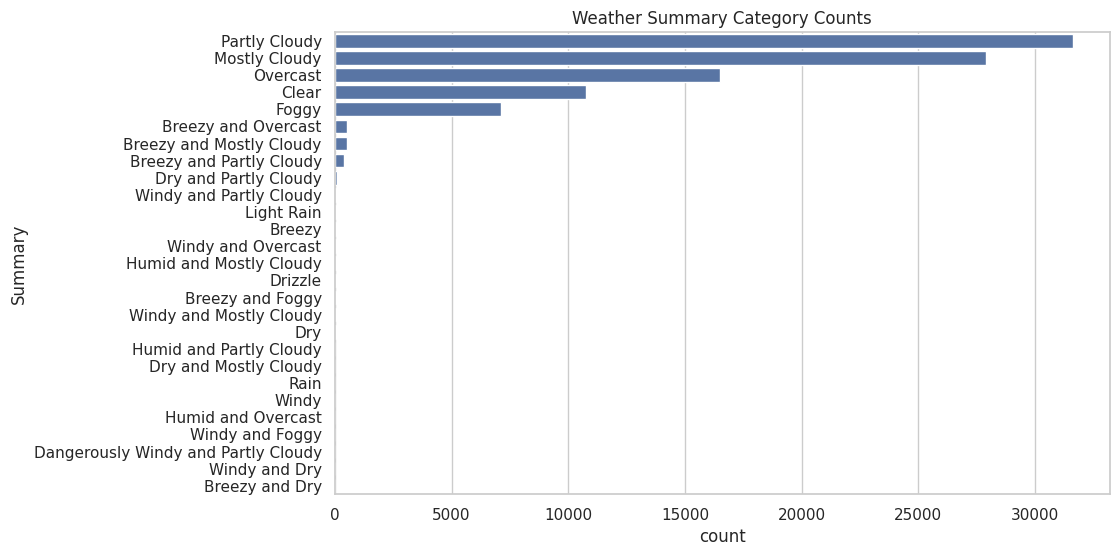

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(y='Summary', data=df, order=df['Summary'].value_counts().index)
plt.title('Weather Summary Category Counts')
plt.show()


### Analysis:

* Data is highly imbalenced, in which max values are from only 4-5 category.

### 2. Temperature (C)

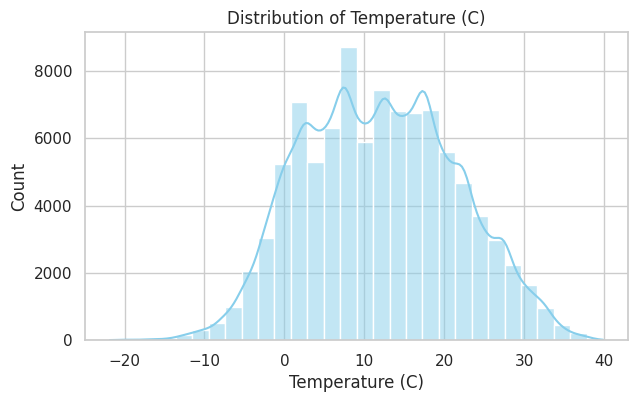

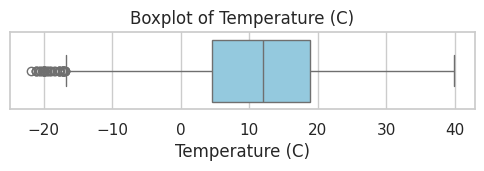

In [17]:
col = 'Temperature (C)'

plt.figure(figsize=(7,4))
sns.histplot(df[col], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Temperature (C)')
plt.xlabel('Temperature (C)')
plt.show()

# Boxplot
plt.figure(figsize=(6,1))
sns.boxplot(x=df['Temperature (C)'], color='skyblue')
plt.title('Boxplot of Temperature (C)')
plt.show()

### Analysis:

* The histogram with KDE shows the overall distribution of temperatures, that looks nomral and max lie in between 2 sigma.

* there is no Outliers, such as unusually high or low temperatures.

* The boxplot reveals the median, quartiles, and outliers.

* Outlier points (dots) far from the box can identify extreme temperature records.

# 3. Wind Bearing (degrees)

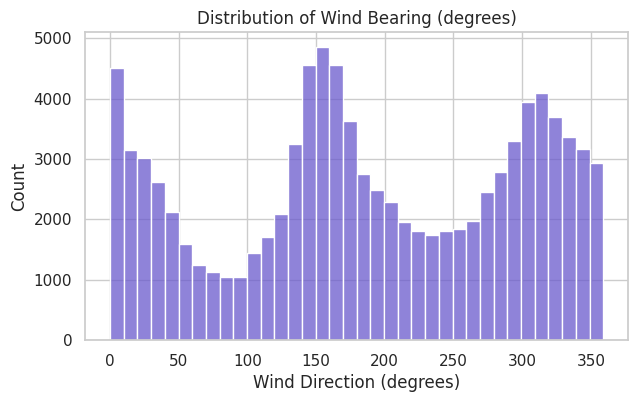

In [20]:
plt.figure(figsize=(7,4))
sns.histplot(df['Wind Bearing (degrees)'], bins=36, color='slateblue')
plt.title('Distribution of Wind Bearing (degrees)')
plt.xlabel('Wind Direction (degrees)')
plt.show()


### Analysis:

* Distribution tells that wind are constant not linear over long time.

# 4. Humidity

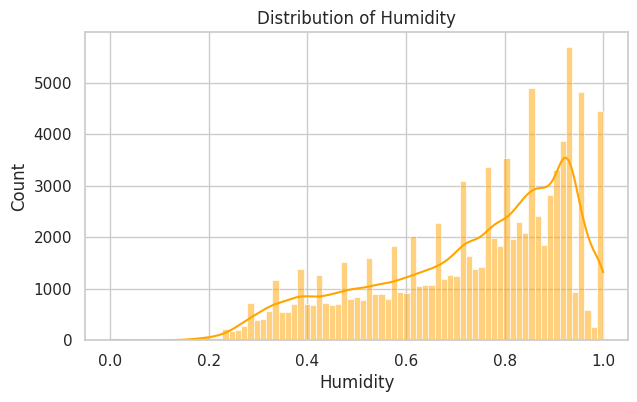

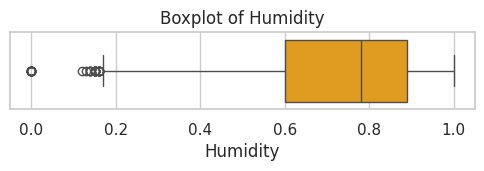

In [18]:
plt.figure(figsize=(7,4))
sns.histplot(df['Humidity'], kde=True, color='orange')
plt.title('Distribution of Humidity')
plt.show()

plt.figure(figsize=(6,1))
sns.boxplot(x=df['Humidity'], color='orange')
plt.title('Boxplot of Humidity')
plt.show()

### Analysis:

* Most humidity values cluster near 1 (high humidity).

* Low outliers could represent unusually dry days.

# 5.  Wind Speed (km/h)

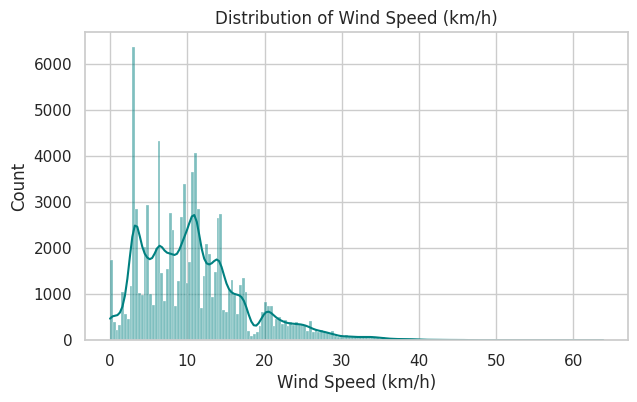

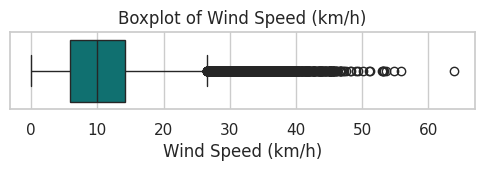

In [19]:
plt.figure(figsize=(7,4))
sns.histplot(df['Wind Speed (km/h)'], kde=True, color='teal')
plt.title('Distribution of Wind Speed (km/h)')
plt.show()

plt.figure(figsize=(6,1))
sns.boxplot(x=df['Wind Speed (km/h)'], color='teal')
plt.title('Boxplot of Wind Speed (km/h)')
plt.show()


# 6. Visibility (km)

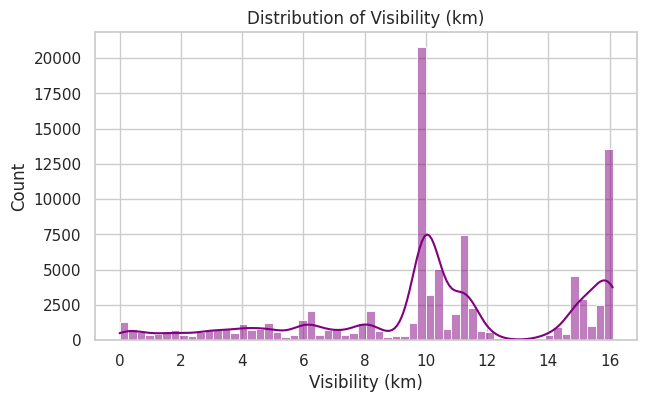

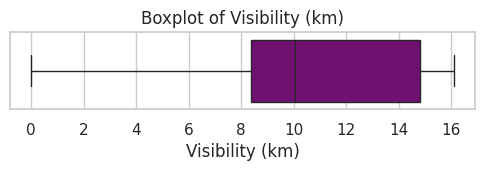

In [21]:
plt.figure(figsize=(7,4))
sns.histplot(df['Visibility (km)'], kde=True, color='purple')
plt.title('Distribution of Visibility (km)')
plt.show()

plt.figure(figsize=(6,1))
sns.boxplot(x=df['Visibility (km)'], color='purple')
plt.title('Boxplot of Visibility (km)')
plt.show()


### Analysis:

* Most values at medium to maximum, occasional low values signal fog, rain, or snow.

* Outliers = poor visibility events.

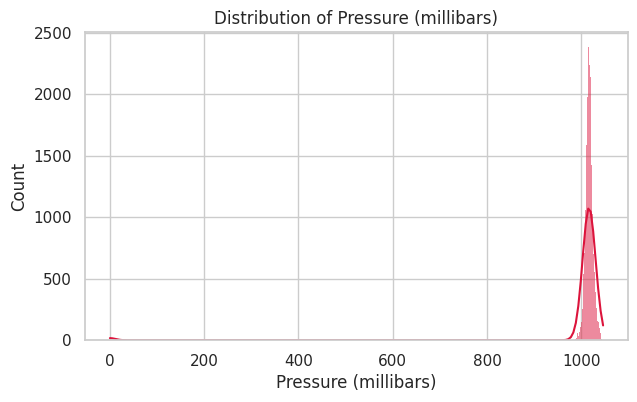

In [23]:
plt.figure(figsize=(7,4))
sns.histplot(df['Pressure (millibars)'], kde=True, color='crimson')
plt.title('Distribution of Pressure (millibars)')
plt.show()


# Multivariate Analysis

### `1. Temperature vs. Humidity (Scatterplot)`
What the plot shows: Scatterplot of all records, with temperature on the x-axis and humidity on the y-axis.

`Analysis:`

* There is a strong negative correlation between temperature and humidity (as temperature increases, humidity generally decreases).

* The points are densely packed at higher humidity when the temperature is lower, and at low humidity when temperature is higher.

* The funnel shape indicates it's rare to have high temperature with high humidity in this dataset.

* Outliers exist (very low humidity regardless of temperature), but the main trend dominates.

* This relationship matches meteorological intuition—the air’s ability to hold moisture increases with temperature, so relative humidity drops as temperature rises if moisture isn't added.

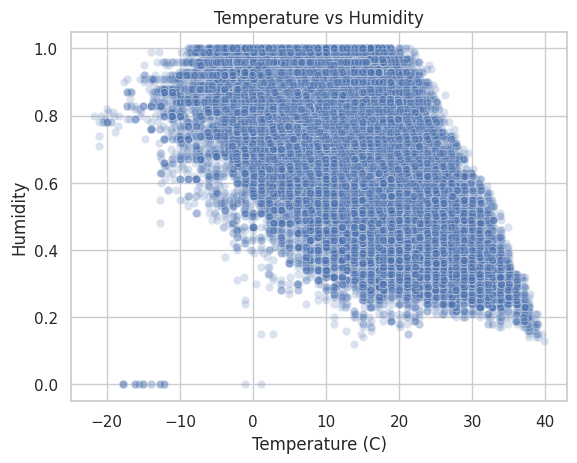

In [25]:
sns.scatterplot(x='Temperature (C)', y='Humidity', data=df, alpha=0.2)
plt.title('Temperature vs Humidity')
plt.show()
# Analysis: Negative correlation typical; higher temperature, lower humidity.


### `2. Temperature Across Months (Seasonality, Boxplot)`
What the plot shows: Boxplots of temperature distributions for each month across the year.

`Analysis:`

* Clear seasonality is visible: Temperature rises from January (~Month 1), peaks in the summer months (June–August), then falls toward the end of the year.

- The spread (interquartile range) of temperature is higher during transitional months, likely due to rapid changes in weather.

- Extreme values and outliers (open circles) are present, especially in colder months (very low temps in Jan, Feb, Dec).

- This validates the dataset's ability to capture natural seasonal cycles essential for modeling tasks.

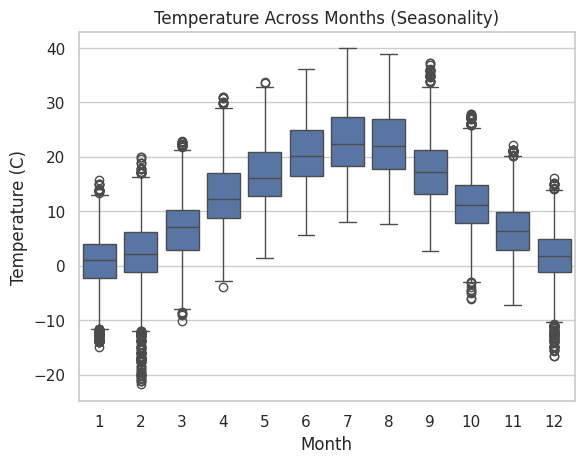

In [24]:
sns.boxplot(x='Month', y='Temperature (C)', data=df)
plt.title('Temperature Across Months (Seasonality)')
plt.show()
# Analysis: Seasonality visible as temperature trends by month.


### `3. Humidity by Part of Day (Boxplot)`
What the plot shows: Boxplots of humidity for ‘morning’, ‘afternoon’, ‘evening’, and ‘night’.

`Analysis:`

- Humidity is generally highest at night and in the morning, decreases in the afternoon, and rises again in the evening.

- Afternoon humidity shows the lowest median and widest spread, possibly reflecting warmth and daytime drying.

- Variability in humidity is highest during the afternoon, with some very low outlier values (dry days).

- This reflects a typical diurnal cycle: overnight cooling raises humidity, while the sun’s heat in the afternoon drops it.

- Such patterns can be exploited for more granular weather predictions by time of day.

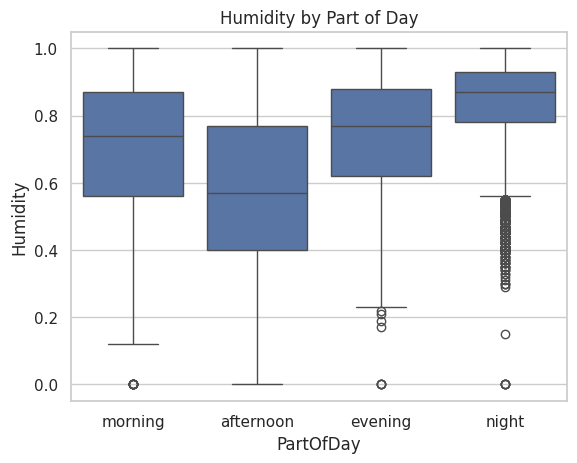

In [26]:
sns.boxplot(x='PartOfDay', y='Humidity', data=df, order=['morning','afternoon','evening','night'])
plt.title('Humidity by Part of Day')
plt.show()
# Analysis: Humidity may vary by part of day due to local weather cycles.
